# Speed dating dataset: exploration 

In this notebook I :  
-  Retrieved the [speed dating dataset](https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment) from the Kaggle competition  
-  Did a descriptive/exploratory analysis of the data
-  Cleaned the dataset for further exploration of selected variables

## About the data  

**Description from the kaggle competition:**  

"Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details."  

> For further information go to references/Speed Dating Data Key.pdf

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import statistics

import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('seaborn-white')

from src.data_cleaning import race_code_fn, field_coded_df, interests_coded_df, palette_20 

## Import data

In [2]:
speed_df_raw = pd.read_csv("data/raw/Speed Dating Data.csv",encoding="unicode_escape" )

#Creaty a copy of original dataset to work with
speed_df=speed_df_raw.copy()
print(speed_df.shape)

(8378, 195)


In [3]:
#Look at first ten rows; use sample to randomly choose 10 samples
speed_df.sample(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
2017,149,8.0,0,15,2,7,16,1,1.0,8,...,8.0,9.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN
5245,353,13.0,0,25,2,14,18,13,13.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6540,431,2.0,0,3,2,17,14,9,9.0,5,...,8.0,10.0,9.0,9.0,10.0,9.0,9.0,9.0,9.0,10.0
1534,105,12.0,1,24,2,4,18,14,NaN,4,...,8.0,7.0,8.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN
1799,127,6.0,1,12,1,5,10,1,NaN,4,...,8.0,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
3528,247,5.0,1,10,1,10,9,3,3.0,4,...,4.0,8.0,7.0,3.0,3.0,2.0,7.0,6.0,6.0,5.0
6012,393,15.0,0,29,2,15,19,3,3.0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8028,537,7.0,1,14,2,21,22,15,13.0,3,...,8.0,9.0,8.0,9.0,10.0,8.0,9.0,9.0,9.0,9.0
3346,230,17.0,1,34,2,9,20,10,17.0,14,...,7.0,7.0,8.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
1553,106,13.0,1,26,2,4,18,1,NaN,17,...,3.0,7.0,9.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN


### Samples and variables

In [4]:
print('There are {} unique participants'.format(speed_df.iid.nunique()))
print('There are {} variables associated to each participant'.format(speed_df.shape[1] -1))

# Confirm number of waves indicated in documentation for dataset
print('There were {} different waves of speed dating'.format(speed_df['wave'].nunique()))

There are 551 unique participants
There are 194 variables associated to each participant
There were 21 different waves of speed dating


In [5]:
# Check number of participants per wave (see documentation)
eda_df = speed_df.copy()
eda_df.groupby(['wave'])['iid'].nunique().sort_values(ascending=False)

# Wave 21 has the most participants (brought a magazine). It can be compared to wave 11 which does not have brought a magazine variation.

wave
21    44
11    42
9     40
14    38
15    37
4     36
2     35
7     32
19    30
12    28
17    24
3     20
8     20
1     20
13    19
5     19
10    18
16    14
20    13
18    12
6     10
Name: iid, dtype: int64

### Variable types  
From dataset documentation, variables can be grouped into:  
* Description of participant: gender, race, career/field of study, income, origin, hobbies etc  
* Statistics related to speed dating of participant: no. of the dates, date station, no. of people met in wave, rating by partner, match  etc
* Importance of attributes in a date: defined by participant, what participant thinks opposite and same sex looks for etc 

In [6]:
# Variable types
speed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


### Missing values

In [7]:
speed_df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [8]:
# Which variables have no missing values
speed_df.columns[speed_df.isnull().sum()==0]

Index(['iid', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order',
       'partner', 'match', 'samerace', 'dec_o', 'dec'],
      dtype='object')

In [9]:
# There appears to be many missing values for most variables 

[print('There are {} variables with less than {} % of missing values'.format(len(speed_df.columns[100*speed_df.isnull().sum()/speed_df.shape[0] <null_thresh]),
 100*null_thresh)) for null_thresh in [0.25, 0.5, 0.75, 0.8, 0.9, 0.95]]

There are 15 variables with less than 25.0 % of missing values
There are 15 variables with less than 50.0 % of missing values
There are 15 variables with less than 75.0 % of missing values
There are 17 variables with less than 80.0 % of missing values
There are 18 variables with less than 90.0 % of missing values
There are 47 variables with less than 95.0 % of missing values


[None, None, None, None, None, None]

## Data exploration  
Explore data before doing any cleaning

### Age, gender and race distribution

In [10]:
from src.data_cleaning import race_code_fn

# Preprocess data for EDA
eda_df_nodup = speed_df.copy()

# Drop repeated iid value
eda_df_nodup.drop_duplicates(subset =["iid"],keep = "first", inplace = True)

# Update gender and race column for plotting
eda_df_nodup['gender'] = ['Male' if gender == 1 else 'Female' for gender in eda_df_nodup['gender'] ]
eda_df_nodup['race'] = [race_code_fn(race) for race in eda_df_nodup.race.tolist()]
eda_df_nodup.shape


(551, 195)

[Text(0.5, 1.0, 'Age distribution per gender'),
 Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Age')]

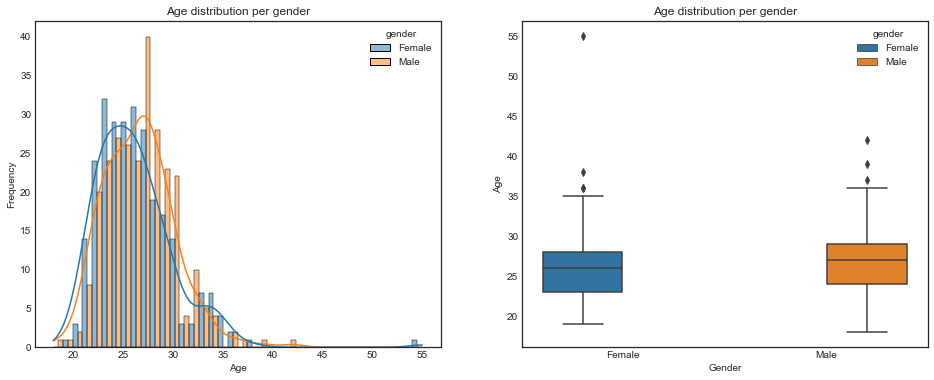

In [11]:
# Plot histogram and boxplot for age and compare by gender
figure, axes = plt.subplots(1, 2, figsize=(16,6))

fig=sns.histplot(data=eda_df_nodup, x='age', hue='gender', multiple="dodge", kde=True, ax=axes[0])
fig.set(title = 'Age distribution per gender' , xlabel='Age', ylabel='Frequency')

fig2=sns.boxplot(data=eda_df_nodup, x="gender", y="age", hue='gender', ax=axes[1])
fig2.set(title = 'Age distribution per gender' , xlabel='Gender', ylabel='Age')

In [12]:
# Quantile distribution of age per gender
eda_df_nodup.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,269.0,26.126394,3.997995,19.0,23.0,26.0,28.0,55.0
Male,274.0,26.587591,3.517824,18.0,24.0,27.0,29.0,42.0


[Text(0.5, 1.0, 'Race distribution per gender'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Race')]

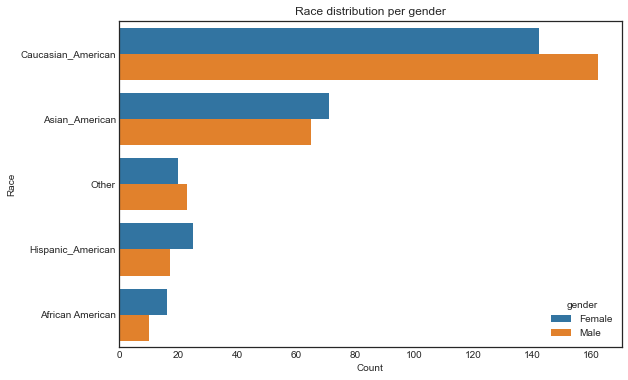

In [13]:
# Plot count plot for race group. Order race group based on number of participants
fig = plt.figure(figsize = (9,6))
fig = sns.countplot( y = 'race', hue = 'gender', data = eda_df_nodup, orient='h', order=eda_df_nodup['race'].value_counts().index)
fig.set(title = 'Race distribution per gender' , xlabel='Count', ylabel='Race')


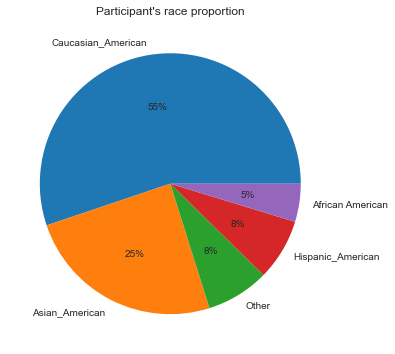

In [14]:
# Pie chart of race representation
plt.figure(figsize = (9,6))

# Value counts for each race group
data = eda_df_nodup.race.value_counts()
labels = eda_df_nodup.race.value_counts().index.tolist()

# Define Seaborn color palette to use
colors = sns.color_palette('tab10')[0:5]

# Create pie chart
plt.pie(data, labels = labels, colors=colors,  autopct='%.0f%%')
plt.title("Participant's race proportion")
plt.show()

### Importance given to race or religous background of date

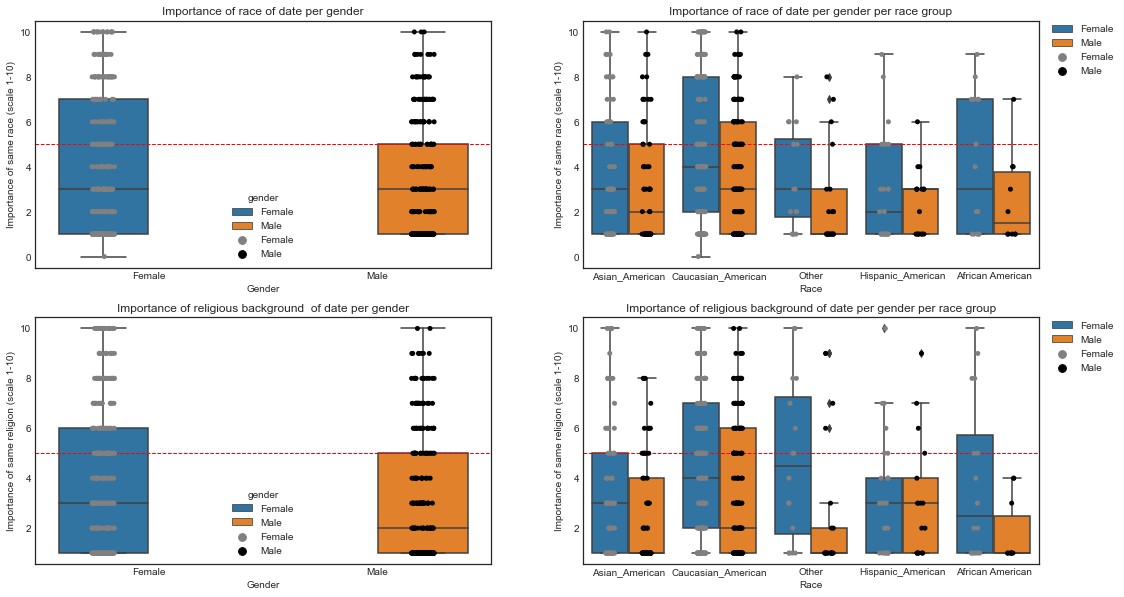

In [15]:
# Plot importance given to date being of same race. Compare between genders and race groups.
figure, axes = plt.subplots(2, 2, figsize=(18,10))

fig=sns.boxplot(data=eda_df_nodup,x="gender", y='imprace', hue='gender', ax=axes[0,0])
fig=sns.stripplot(data=eda_df_nodup, x="gender", y="imprace", hue='gender',dodge = True, ax=axes[0,0], palette={'Male':'black', 'Female':'grey'})
fig.set(title = 'Importance of race of date per gender' , xlabel='Gender', ylabel='Importance of same race (scale 1-10)')
fig.axhline(5, linewidth=1,linestyle = 'dashed',color='red')

fig2=sns.boxplot(data=eda_df_nodup,x="race", y='imprace', hue='gender', ax=axes[0,1])
fig2=sns.stripplot(data=eda_df_nodup, x="race", y="imprace", hue='gender',ax=axes[0,1], dodge=True, palette={'Male':'black', 'Female':'grey'})
fig2.axhline(5, linewidth=1,linestyle = 'dashed',color='red')
fig2.set(title = 'Importance of race of date per gender per race group' , xlabel='Race', ylabel='Importance of same race (scale 1-10)')
fig2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig3=sns.boxplot(data=eda_df_nodup,x="gender", y='imprelig', hue='gender', ax=axes[1,0])
fig3=sns.stripplot(data=eda_df_nodup, x="gender", y="imprelig", hue='gender',dodge = True, ax=axes[1,0], palette={'Male':'black', 'Female':'grey'})
fig3.set(title = 'Importance of religious background  of date per gender' , xlabel='Gender', ylabel='Importance of same religion (scale 1-10)')
fig3.axhline(5, linewidth=1,linestyle = 'dashed',color='red')

fig4=sns.boxplot(data=eda_df_nodup,x="race", y='imprelig', hue='gender', ax=axes[1,1])
fig4=sns.stripplot(data=eda_df_nodup, x="race", y="imprelig", hue='gender',ax=axes[1,1], dodge=True, palette={'Male':'black', 'Female':'grey'})
fig4.axhline(5, linewidth=1,linestyle = 'dashed',color='red')
fig4.set(title = 'Importance of religious background of date per gender per race group' , xlabel='Race', ylabel='Importance of same religion (scale 1-10)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


### Field of study

In [16]:
# Retrieve coded field names for plotting
from src.data_cleaning import field_coded_df

print(field_coded_df.head())

# Use field coded field names for plotting. Merge to original dataframe 
eda_df_nodup= eda_df_nodup.merge(field_coded_df, how='left', on='field_cd')
eda_df_nodup.field_cd_name[0:5]



   field_cd                    field_cd_name
0         1                              Law
1         2                             Math
2         3      Social Science/Psychologist
3         4  Medical/Pharmaceuticals/Biotech
4         5                      Engineering


0     Law
1     Law
2    Math
3     Law
4     Law
Name: field_cd_name, dtype: object

[Text(0.5, 1.0, 'Field of study distribution per gender'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Field of study')]

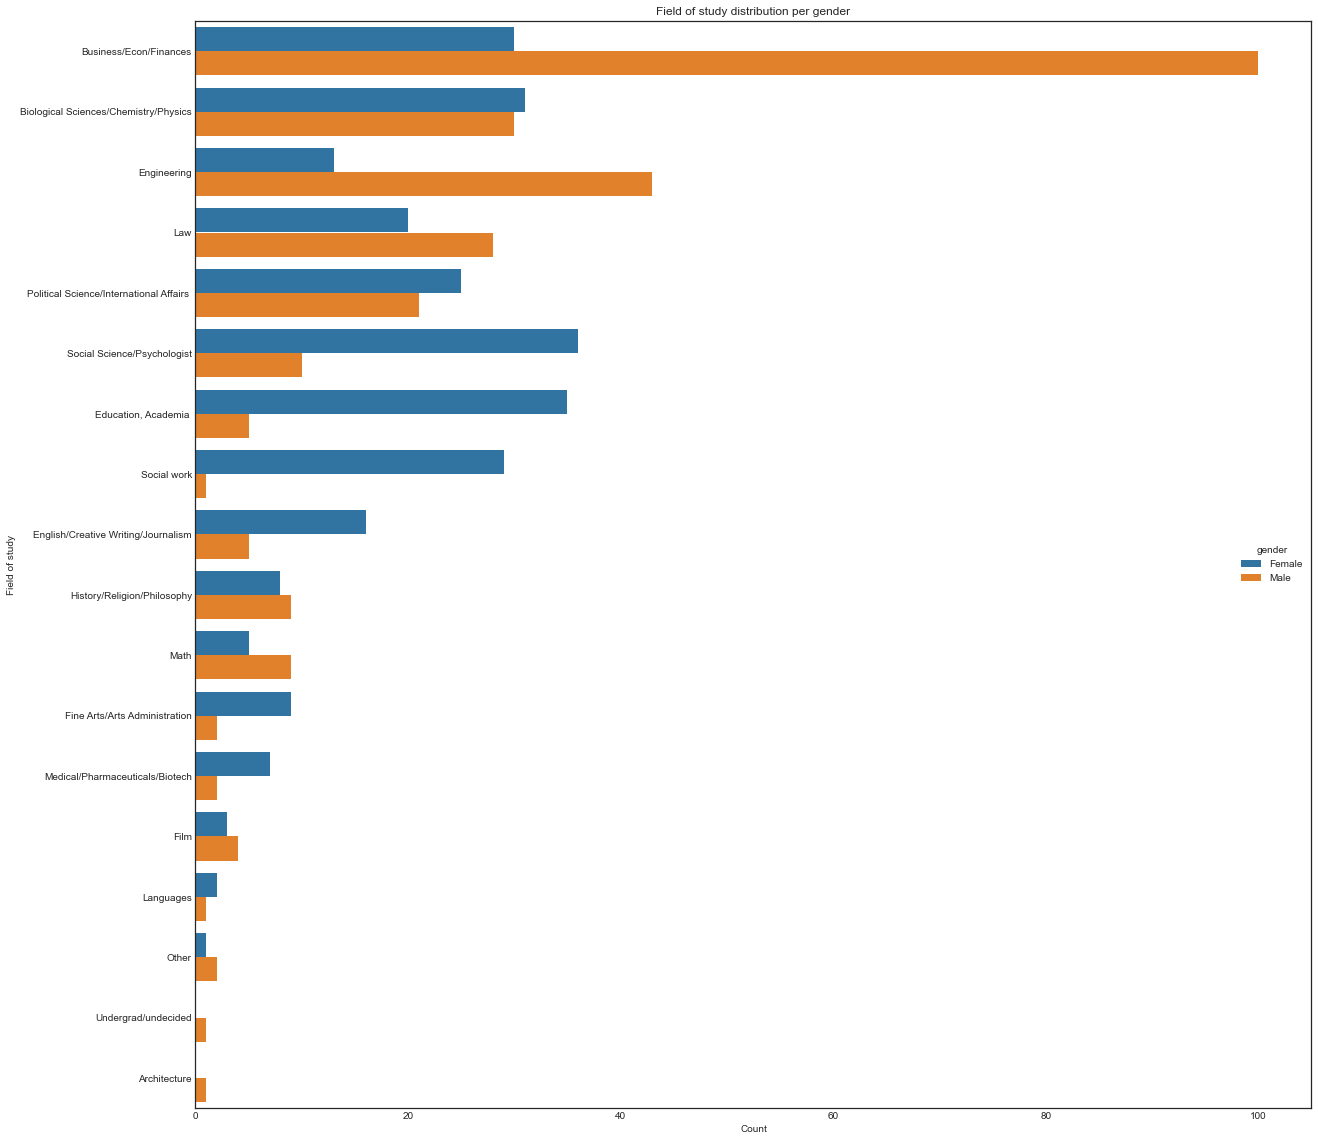

In [17]:
# Plot count plot for field of study group. Order field of study group based on number of participants
fig = plt.figure(figsize = (20,20))
fig = sns.countplot( y = 'field_cd_name', hue = 'gender', data = eda_df_nodup, orient='h',  order=eda_df_nodup['field_cd_name'].value_counts().index)
fig.set(title = 'Field of study distribution per gender' , xlabel='Count', ylabel='Field of study')

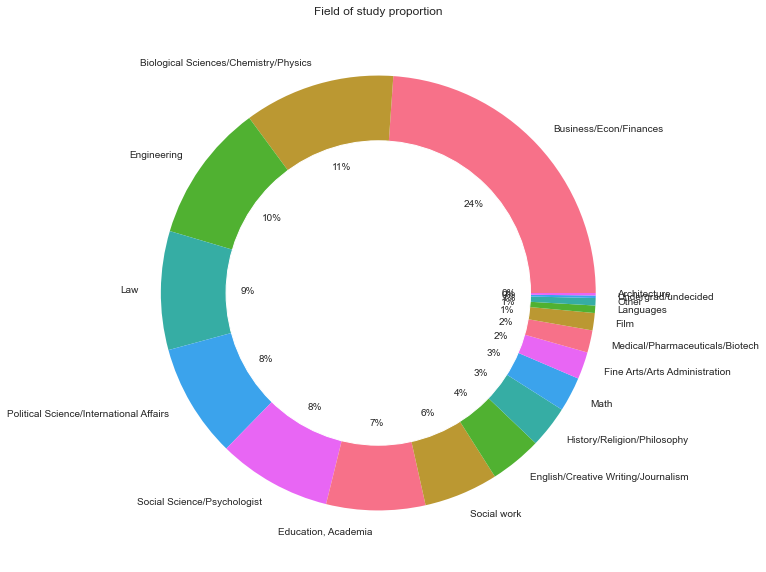

In [18]:
# Pie chart of field of study
plt.figure(figsize = (10,10))

# Value counts for each field of study group
data = eda_df_nodup.field_cd_name.value_counts()
labels = eda_df_nodup.field_cd_name.value_counts().index.tolist()

# Define Seaborn color palette to use
colors = sns.color_palette('husl')[0:eda_df_nodup.field_cd_name.nunique()]

# Create donut chart
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data, labels = labels, colors=colors,  autopct='%.0f%%')
plt.title("Field of study proportion")
plt.gca().add_artist(my_circle)
plt.show()

### Interests

In [19]:
# List of interests
interests_ls = ["sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading",
 "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]

# Dataframe subset with interests
eda_df_interests = eda_df_nodup[['iid', 'gender']+interests_ls]
eda_df_interests.head()

,iid,gender,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,Female,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
1,2,Female,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0
2,3,Female,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0
3,4,Female,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0
4,5,Female,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0


In [20]:
# Update name of columns to create table using pivot wode to long
interests_ls_code = ["INT"+str(interest) for interest in range(0,len(interests_ls))]
eda_df_interests.columns = ['iid', 'gender']+interests_ls_code
eda_df_interests.columns

Index(['iid', 'gender', 'INT0', 'INT1', 'INT2', 'INT3', 'INT4', 'INT5', 'INT6',
       'INT7', 'INT8', 'INT9', 'INT10', 'INT11', 'INT12', 'INT13', 'INT14',
       'INT15', 'INT16'],
      dtype='object')

In [21]:
# Pivot wide to long dataframe to be used for plotting
from src.data_cleaning import interests_coded_df

eda_df_interests = pd.wide_to_long(eda_df_interests, stubnames='INT', i=['iid', 'gender'], j='interest')
eda_df_interests.columns = ['interest_score']
eda_df_interests.reset_index(['iid','gender','interest'], inplace = True)
eda_df_interests = eda_df_interests.merge(interests_coded_df, how="left", on="interest")
eda_df_interests.head(10)

,iid,gender,interest,interest_score,interest_name
0,1,Female,0,9.0,sports
1,1,Female,1,2.0,tvsports
2,1,Female,2,8.0,exercise
3,1,Female,3,9.0,dining
4,1,Female,4,1.0,museums
5,1,Female,5,1.0,art
6,1,Female,6,5.0,hiking
7,1,Female,7,1.0,gaming
8,1,Female,8,5.0,clubbing
9,1,Female,9,6.0,reading


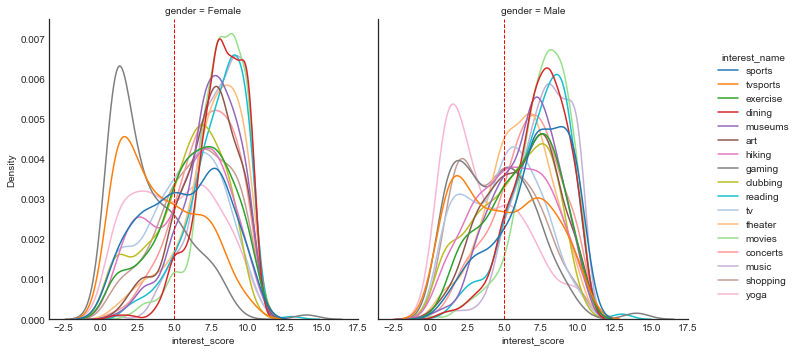

In [23]:
# Plot distribution of scores per interest. Compare score distribution between males and females
from src.data_cleaning import palette_20

fig = sns.displot(data =eda_df_interests, x='interest_score', hue='interest_name', kind = 'kde', col = 'gender', palette= palette_20[:eda_df_interests.interest_name.nunique()])

ax1, ax2 = fig.axes[0]

ax1.axvline(5, linewidth=1,linestyle = 'dashed',color='red')
ax2.axvline(5, linewidth=1,linestyle = 'dashed',color='red')

### Speed dates per participant

In [24]:
# Due to the different waves of speed dating, look at distribution of number of dates per participant
import statistics

eda_df = speed_df.copy()
dates_per_iid = eda_df.groupby(['iid'])['iid'].count()

print('Max number of dates per participant:', max(dates_per_iid))
print('Min number of dates per participant:', min(dates_per_iid))
print('Most frequent number of dates per participant:', statistics.mode(dates_per_iid))

# Visualize distribution of number of dates per participant

print('Quantile distribution of number of dates per participant:', np.quantile(dates_per_iid, [0, 0.25, 0.5, 0.75, 1]))

Max number of dates per participant: 22
Min number of dates per participant: 5
Most frequent number of dates per participant: 10
Quantile distribution of number of dates per participant: [ 5. 10. 16. 20. 22.]


In [25]:
# Check number of dates per gender. Should be the same as same number of men and women per wave
eda_df = speed_df.copy()
dates_per_iid_sex = pd.DataFrame(eda_df.groupby(['iid', 'gender'])['iid'].count())
dates_per_iid_sex.columns = ['freq']
dates_per_iid_sex.reset_index(['iid','gender'], inplace = True)

mean_total_men = np.mean(dates_per_iid_sex[(dates_per_iid_sex.gender == 1)]['freq'])
mean_total_women = np.mean(dates_per_iid_sex[(dates_per_iid_sex.gender == 0)]['freq'])

print('Mean number of dates per male participant:', mean_total_men)
print('Mean number of dates per female participant:', mean_total_women)


Mean number of dates per male participant: 15.140794223826715
Mean number of dates per female participant: 15.27007299270073


In [26]:
# Distribution of number of dates per male(1) and female(0) participant
dates_per_iid_sex.groupby('gender')['freq'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,274.0,15.270073,4.813753,5.0,10.0,16.0,19.0,22.0
1,277.0,15.140794,5.211995,5.0,10.0,16.0,20.0,22.0


### Matched dates per participant

In [27]:
# Count number of matched dates over all speed dates that took place (independetly of iid)
eda_df = speed_df.copy()
match_date_ct = eda_df.groupby(['match'])['match'].count()

print('Of {} total speed dates, {}% got a match'.format(sum(match_date_ct), round (100* match_date_ct[1] / sum(match_date_ct))))

Of 8378 total speed dates, 16% got a match


In [28]:
# Dataframe of number of matched dates per participant. Split between genders
eda_df = speed_df.copy()
match_date_periid = pd.DataFrame(eda_df.groupby(['iid', 'match', 'gender'])['iid'].count())
match_date_periid.columns = ['freq']
match_date_periid.reset_index(['iid','match', 'gender'], inplace = True)
# Update gender for plotting
match_date_periid['gender'] = ['Male' if gender == 1 else 'Female' for gender in match_date_periid['gender'] ]

match_date_periid.head()

,iid,match,gender,freq
0,1,0,Female,6
1,1,1,Female,4
2,2,0,Female,8
3,2,1,Female,2
4,3,0,Female,10


[Text(0.5, 1.0, 'Matched dates per gender'),
 Text(0.5, 0, 'Date matched (Yes = 1)'),
 Text(0, 0.5, 'Frequency')]

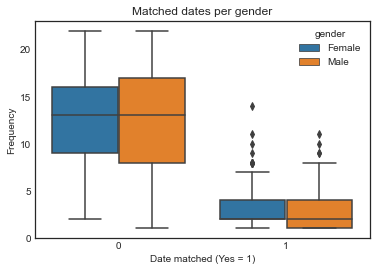

In [29]:
# Compare overall matched dates between gender
fig = sns.boxplot(data=match_date_periid, x="match", y="freq", hue='gender')
fig.set(title ="Matched dates per gender", xlabel='Date matched (Yes = 1)', ylabel='Frequency')

In [30]:
# Distribution of number of dates per male(1) and female(0) participant
match_date_periid.groupby(['gender','match'])['freq'].describe()

count       mean       std  min  25%   50%   75%   max
gender match                                                        
Female 0      274.0  12.751825  4.746745  2.0  9.0  13.0  16.0  22.0
       1      221.0   3.122172  2.233730  1.0  2.0   2.0   4.0  14.0
Male   0      277.0  12.649819  4.999649  1.0  8.0  13.0  17.0  22.0
       1      231.0   2.987013  2.106884  1.0  1.0   2.0   4.0  11.0

## Conclusions on data description  

* There are **551 unique participants**  
* There are **194 variables** associated to each participant  
* There were **21 different waves** of speed dating  
* **Wave 21** had the **most participants** (n = 44) with ‘brought a magazine’ variant. Can be compared to wave 11 (did not bring a magazine, n=42)   
* There are a lot of missing values. As an example, there are 18/194 variables with less than 90.0 % of missing values  
<br>
### Age gender and race distribution 
* Most participants are between **20-30 years old**  
* **Men** tend to be **older** than women   
   
* More than **50% of participants** are of **caucasian-american** origin, followed by 25% of asian-american  
* **Women** tend to give **greater importance** to **race and religious background** of date than men  
* **Caucasian-americans** tend to give **greater importance** to both **race and religious background** of date compared to other racial groups  
* Hispanic-americans tend to give greater importance to religious background of date and less importance to race  
<br>
### Field of study  
* The most representative fields of study indicated are:   
 
    - **Business/Econ/Finances (25%)**  
    - BiologicalSciences/Chemistry/Physics (11%)  
    - Engineering (10%)  
<br>
### Interests  
* Men and women appear **similarly interested** in **movies**, **dining** and **reading**   
 
* Women seem little interested in gaming compared to men  
* Men seem little interested in yoga compared to women  
<br>  
### Number of dates and success  

* People participating at the event had at maximum 22 dates and at minimum 5 dates, with 10 dates being the most frequent  
 
* Of 8378 total speed dates,  **only 16% got a match**  
* **Women** tended to get **more matched dates** than men   
* The maximum number of matched dates per participant was: 14 for a woman and 11 for a man  